<a href="https://colab.research.google.com/github/TranToQuePhuong/AI_Lab08/blob/master/3_Exercises_SVM_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Exercises


- dataset: 'Iris.csv'


In [184]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [185]:
df = pd.read_csv('Iris.csv')

## 1) Data Analysis

In [186]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [188]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [189]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [190]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [191]:
df.shape

(150, 6)

In [192]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [193]:
df[df['Species'] == 'Iris-setosa'].shape

(50, 6)

In [194]:
print("Total number of Species: {}".format(df.shape[0]))
print("Number of Iris-setosa: {}".format(df[df.Species == 'Iris-setosa'].shape[0]))
print("Number of Iris-versicolor: {}".format(df[df.Species == 'Iris-versicolor'].shape[0]))
print("Number of Iris-virginica: {}".format(df[df.Species == 'Iris-virginica'].shape[0]))


Total number of Species: 150
Number of Iris-setosa: 50
Number of Iris-versicolor: 50
Number of Iris-virginica: 50


In [195]:
df.shape

(150, 6)

## 2) Data Processing

###  `features` and `labels`

In [196]:
X=df.iloc[:, :-1]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


### Data Encoding

In [197]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode Species category
# Iris-setosa --> 0
# Iris-versicolor --> 1
# Iris-virginica --> 2

Species_encoder = LabelEncoder()


In [198]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [199]:
Species_encoder.fit(y)
y = Species_encoder.transform(y)

In [200]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [201]:
Species_encoder.inverse_transform(y)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### Data Standardization


In [202]:
X.shape

(150, 5)

In [203]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Splitting dataset into training set and testing set for better generalisation

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3)   Support Vector Machine
- Using differrent `kernels`

#### Default kernel (=> kernel='rbf')

In [205]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters


In [206]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- ==>  kernel='rbf' is the default

In [207]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [208]:
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


#### Linear kernel

In [209]:

svc=SVC(kernel='linear')
svc


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


#### Polynomial kernel

In [211]:
svc=SVC(kernel='poly')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset

## 4) K-fold cross validation with different kernels

### a) CV on Linear kernel

In [213]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 - ==> C = 1.0

In [214]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [215]:
print(scores.mean())

1.0


In K-fold cross validation we generally take the mean of all the scores.

#### Change value of `C`

In [216]:
C_range=list(range(1,26))
acc_score=[]


In [217]:
print(C_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [218]:
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

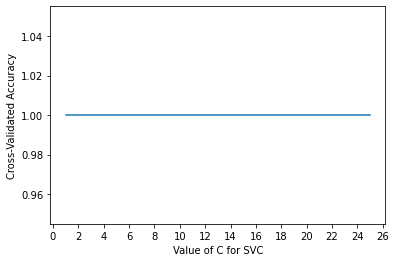

In [219]:
import matplotlib.pyplot as plt

C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [220]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]

In [221]:
C_range

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000001,
 1.5000000000000002,
 1.6,
 1.7000000000000002,
 1.8000000000000003,
 1.9000000000000001,
 2.0,
 2.1,
 2.2,
 2.3000000000000003,
 2.4000000000000004,
 2.5000000000000004,
 2.6,
 2.7,
 2.8000000000000003,
 2.9000000000000004,
 3.0000000000000004,
 3.1,
 3.2,
 3.3000000000000003,
 3.4000000000000004,
 3.5000000000000004,
 3.6,
 3.7,
 3.8000000000000003,
 3.9000000000000004,
 4.0,
 4.1,
 4.2,
 4.3,
 4.3999999999999995,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9]

In [222]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9933333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

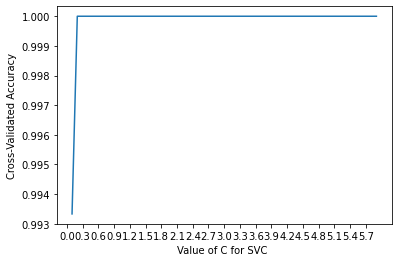

In [223]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

### b) CV on rbf kernel

In [224]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [225]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [226]:
print(scores.mean())

1.0


#### Change `gamma`
- gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. - When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad.
- When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points

In [227]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.96, 0.96, 0.9866666666666667, 1.0, 0.9866666666666667, 0.8466666666666667, 0.35333333333333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

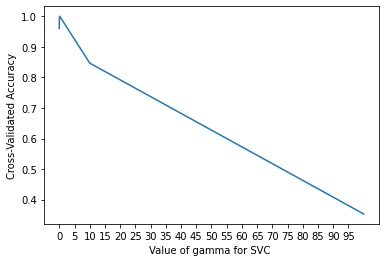

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

- ==> Show that `gamma from 10` decreases, therefore we will find `gamma` with the most accuracy in range (0,0.1) 


In [229]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.96, 0.96, 0.9866666666666667, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

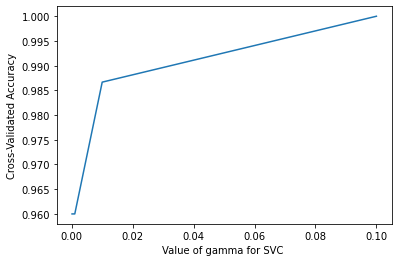

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [231]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9866666666666667, 0.9933333333333334, 0.9933333333333334, 0.9933333333333334, 0.9933333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

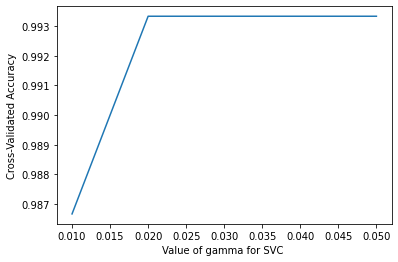

In [232]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

- ==> choose `gamma=0.02`

#### Build model with `gamma = 0.02`

In [233]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf', gamma = 0.02)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         0.93333333 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [234]:
print(scores.mean())

0.9933333333333334


### c) CV on Polynomial kernel

In [235]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [236]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.93333333 0.93333333 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [237]:
print(scores.mean())

0.9866666666666667


#### Taking polynomial kernel with different degree

In [238]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.8666666666666666, 0.9866666666666667, 0.86, 0.9400000000000001, 0.8400000000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

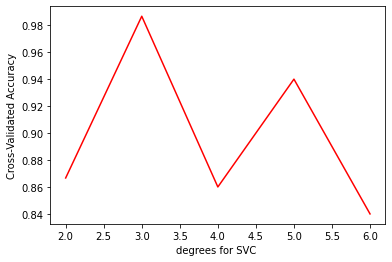

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

## 5) Using 'RandomizedSearchCV`
- All of above steps can be performed by using `GridSearchCV` or `RandomizedSearchCV`

In [240]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


kernel_options = ['linear', 'poly', 'rbf']
C_options =  np.arange(1, 10, 0.001).tolist()
gamma_options =  np.arange(1, 10, 0.001).tolist()

param_grid = dict(kernel = kernel_options, C = C_options, gamma = gamma_options)

start_time = time.time()
clf = SVC()

#param_grid : grid của các thông số cần thay đổi
random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, cv = 8, scoring = 'accuracy')
random


RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1.0, 1.001, 1...
                                                  1.018999999999998,
                                                  1.0199999999999978,
                                                  1.0209999999999977,
                                                  1.0219999999999976,
                                                  1.0229999999999975,
                                                  1.

In [241]:
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [242]:
start_time = time.time()
random_result = random.fit(X, y)
print("Best: %f using %s" % (random.best_score_, random.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 1.000000 using {'kernel': 'poly', 'gamma': 6.565999999999387, 'C': 7.705999999999261}
Execution time: 0.11794495582580566 ms


In [243]:
best_clf = random.best_estimator_ 

In [244]:
random.best_params_

{'C': 7.705999999999261, 'gamma': 6.565999999999387, 'kernel': 'poly'}

##### find the best model


In [245]:
random.best_score_

1.0